# Dump out constrained ERF time series

By component, as requested by BB Cael

Theme Song: Matmos<br>
Artist: Amplifier<br>
Album: Echo Street<br>
Released: 2013

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

from ar6.utils.h5 import *

In [2]:
results = load_dict_from_hdf5('../data_output_large/twolayer_AR6-historical.h5')

In [3]:
results.keys()

dict_keys(['AR6-historical', 'AR6-historical_climuncert', 'remove_aerosol', 'remove_aerosol-cloud_interactions', 'remove_aerosol-cloud_interactions_climuncert', 'remove_aerosol-radiation_interactions', 'remove_aerosol-radiation_interactions_climuncert', 'remove_aerosol_climuncert', 'remove_albedo', 'remove_albedo_climuncert', 'remove_anthro', 'remove_anthro_climuncert', 'remove_bc_on_snow', 'remove_bc_on_snow_climuncert', 'remove_ch4', 'remove_ch4_climuncert', 'remove_co2', 'remove_co2_climuncert', 'remove_contrails', 'remove_contrails_climuncert', 'remove_h2o_stratospheric', 'remove_h2o_stratospheric_climuncert', 'remove_land_use', 'remove_land_use_climuncert', 'remove_n2o', 'remove_n2o_climuncert', 'remove_natural', 'remove_natural_climuncert', 'remove_o3', 'remove_o3_climuncert', 'remove_other_wmghg', 'remove_other_wmghg_climuncert', 'remove_solar', 'remove_solar_climuncert', 'remove_volcanic', 'remove_volcanic_climuncert', 'remove_wmghgs', 'remove_wmghgs_climuncert'])

In [4]:
results['AR6-historical_climuncert']['effective_radiative_forcing'].shape

(270, 2237)

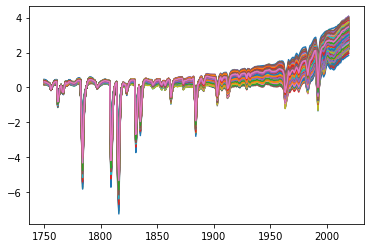

In [5]:
pl.plot(np.arange(1750,2020), results['AR6-historical_climuncert']['effective_radiative_forcing']);

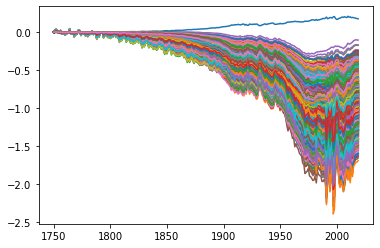

In [6]:
pl.plot(np.arange(1750,2020), 
        results['AR6-historical_climuncert']['effective_radiative_forcing'] - results['remove_aerosol_climuncert']['effective_radiative_forcing']);

In [7]:
np.percentile(
    (
        results['AR6-historical_climuncert']['effective_radiative_forcing'][255:265,:] -
        results['remove_aerosol_climuncert']['effective_radiative_forcing'][255:265,:]
    ).mean(axis=0),
(5, 50, 95))

array([-1.52093972, -1.07610293, -0.57837815])

In [8]:
# aerosols
df = pd.DataFrame(
    results['AR6-historical_climuncert']['effective_radiative_forcing'] -
    results['remove_aerosol_climuncert']['effective_radiative_forcing'], 
    index=range(1750, 2020)
)
df
df.to_csv('../data_output_large/WG1_constrained_ERF_ensemble_aerosol.csv')

In [9]:
# co2
df = pd.DataFrame(
    results['AR6-historical_climuncert']['effective_radiative_forcing'] -
    results['remove_co2_climuncert']['effective_radiative_forcing'], 
    index=range(1750, 2020)
)
df
df.to_csv('../data_output_large/WG1_constrained_ERF_ensemble_co2.csv')

In [10]:
# other anthro = anthro - co2 - aerosol
df = pd.DataFrame(
    results['AR6-historical_climuncert']['effective_radiative_forcing'] -
    results['remove_anthro_climuncert']['effective_radiative_forcing'] -
    
    (results['AR6-historical_climuncert']['effective_radiative_forcing'] -
    results['remove_co2_climuncert']['effective_radiative_forcing']) -
    
    (results['AR6-historical_climuncert']['effective_radiative_forcing'] -
    results['remove_aerosol_climuncert']['effective_radiative_forcing']) 
    , 
    index=range(1750, 2020)
)
df
df.to_csv('../data_output_large/WG1_constrained_ERF_ensemble_non-co2-non-aerosol-anthro.csv')

In [11]:
# volcanic
df = pd.DataFrame(
    results['AR6-historical_climuncert']['effective_radiative_forcing'] -
    results['remove_volcanic_climuncert']['effective_radiative_forcing'], 
    index=range(1750, 2020)
)
df
df.to_csv('../data_output_large/WG1_constrained_ERF_ensemble_volcanic.csv')

In [12]:
# solar
df = pd.DataFrame(
    results['AR6-historical_climuncert']['effective_radiative_forcing'] -
    results['remove_solar_climuncert']['effective_radiative_forcing'], 
    index=range(1750, 2020)
)
df
df.to_csv('../data_output_large/WG1_constrained_ERF_ensemble_solar.csv')